<a href="https://colab.research.google.com/github/aparijit05072004/Human-Body-Measurements-DataAnalysis/blob/main/Capstone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
path="/content/drive/MyDrive/Capstone 1/nhanes_adult_male_bmx_2020.csv"
df=pd.read_csv(path)
df.head(30)

,Weight(kg),Height(cm),ArmL(cm),LegL(cm),ArmC(cm),HipC(cm),WaistC(cm)
0,98.8,182.3,42.0,40.1,38.2,108.2,120.4
1,74.3,184.2,41.1,41.0,30.2,94.5,86.8
2,103.7,185.3,47.0,44.0,32.0,107.8,109.6
3,86.0,167.8,39.5,38.4,29.0,106.4,108.3
4,99.4,181.6,40.4,39.9,36.0,120.2,107.0
5,90.2,162.5,38.7,38.0,37.3,110.2,116.2
6,45.5,159.3,36.2,38.0,24.4,82.0,67.2
7,64.0,174.9,37.0,45.0,29.2,88.9,82.5
8,67.9,166.2,37.3,40.3,31.0,93.4,87.0
9,75.2,172.6,38.6,41.5,32.0,96.4,95.0


In [5]:
path="/content/drive/MyDrive/Capstone 1/nhanes_adult_female_bmx_2020.csv"
df=pd.read_csv(path)
df.head(30)

,Weight(kg),Height(cm),ArmL(cm),LegL(cm),ArmC(cm),HipC(cm),WaistC(cm)
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2
5,62.0,144.7,32.5,34.2,29.8,106.7,84.8
6,66.2,166.5,37.5,37.6,32.0,96.3,95.7
7,75.9,154.5,35.4,37.6,32.7,107.7,98.7
8,77.2,159.2,38.5,40.5,35.7,102.0,97.5
9,91.6,174.5,36.1,45.9,35.2,121.3,100.3


In [6]:
female = np.loadtxt(
    "/content/drive/MyDrive/Capstone 1/nhanes_adult_female_bmx_2020.csv",
    delimiter=",",
    skiprows=1
)

male = np.loadtxt(
    "/content/drive/MyDrive/Capstone 1/nhanes_adult_male_bmx_2020.csv",
    delimiter=",",
    skiprows=1
)

female.shape, male.shape


((4221, 7), (4081, 7))

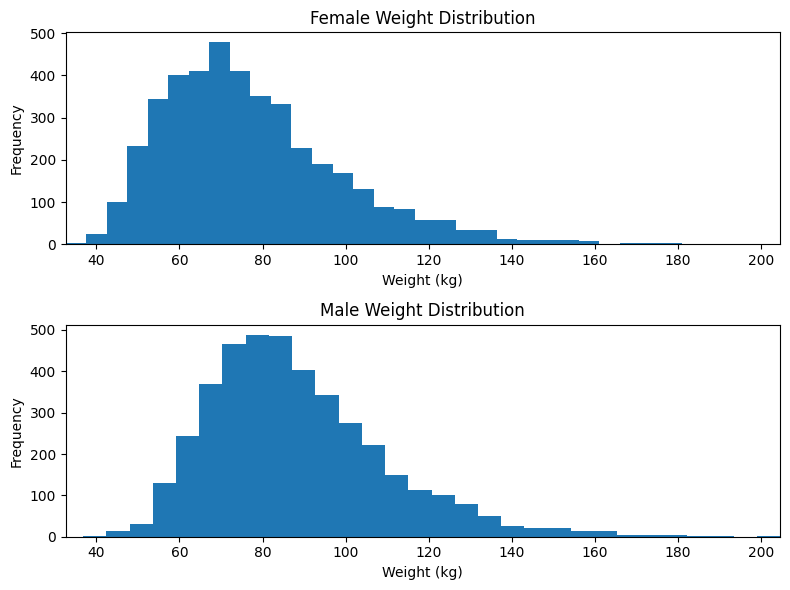

In [7]:
female_weights = female[:, 0]
male_weights = male[:, 0]

xmin = min(female_weights.min(), male_weights.min())
xmax = max(female_weights.max(), male_weights.max())

plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.hist(female_weights, bins=30)
plt.xlim(xmin, xmax)
plt.title("Female Weight Distribution")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")

plt.subplot(2, 1, 2)
plt.hist(male_weights, bins=30)
plt.xlim(xmin, xmax)
plt.title("Male Weight Distribution")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


/tmp/ipython-input-4160003924.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights, male_weights], labels=["Female", "Male"])


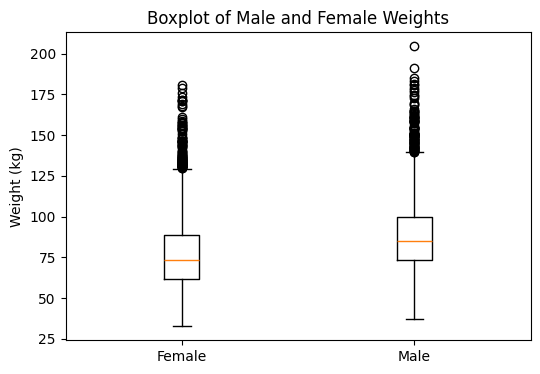

In [8]:
plt.figure(figsize=(6, 4))
plt.boxplot([female_weights, male_weights], labels=["Female", "Male"])
plt.ylabel("Weight (kg)")
plt.title("Boxplot of Male and Female Weights")
plt.show()


In [9]:
def describe_distribution(data):
    return {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "Standard Deviation": np.std(data),
        "Skewness": stats.skew(data),
        "Kurtosis": stats.kurtosis(data)
    }

female_stats = describe_distribution(female_weights)
male_stats = describe_distribution(male_weights)

female_stats, male_stats


({'Mean': np.float64(77.40379057095475),
  'Median': np.float64(73.6),
  'Standard Deviation': np.float64(21.54250829019315),
  'Skewness': np.float64(1.03336107186799),
  'Kurtosis': np.float64(1.4009683480659731)},
 {'Mean': np.float64(88.36454300416565),
  'Median': np.float64(85.0),
  'Standard Deviation': np.float64(21.418936717962495),
  'Skewness': np.float64(0.9842810741662347),
  'Kurtosis': np.float64(1.4742884754078238)})

In [10]:
height_m = female[:, 1] / 100   # cm → meters
weight_kg = female[:, 0]

bmi_female = weight_kg / (height_m ** 2)

female = np.column_stack((female, bmi_female))
female.shape


(4221, 8)

In [11]:
zfemale = (female - np.mean(female, axis=0)) / np.std(female, axis=0)


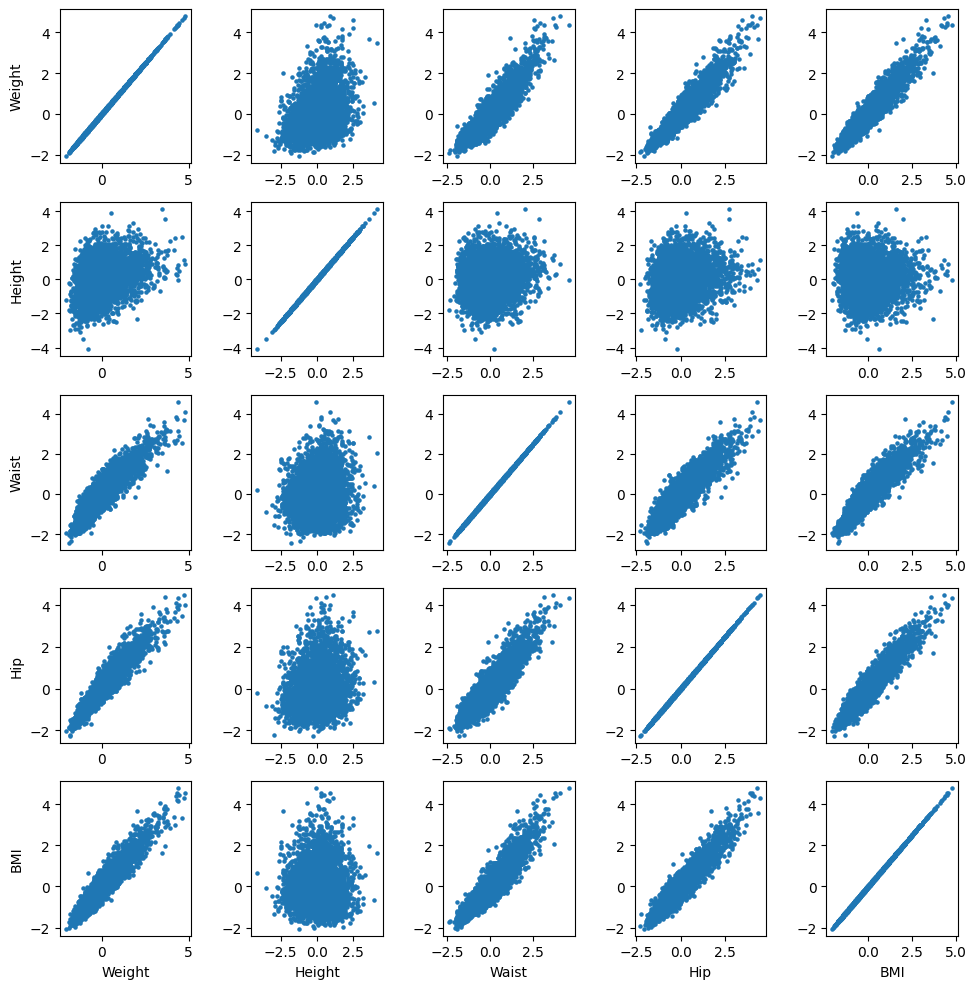

In [12]:
cols = [0, 1, 6, 5, 7]  # weight, height, waist, hip, BMI
labels = ["Weight", "Height", "Waist", "Hip", "BMI"]

plt.figure(figsize=(10, 10))

for i in range(len(cols)):
    for j in range(len(cols)):
        plt.subplot(len(cols), len(cols), i*len(cols) + j + 1)
        plt.scatter(zfemale[:, cols[j]], zfemale[:, cols[i]], s=5)
        if i == len(cols)-1:
            plt.xlabel(labels[j])
        if j == 0:
            plt.ylabel(labels[i])

plt.tight_layout()
plt.show()


In [13]:
pearson_corr = np.corrcoef(zfemale[:, cols].T)
spearman_corr = stats.spearmanr(zfemale[:, cols]).correlation

pearson_corr, spearman_corr


(array([[1.        , 0.34549627, 0.90455038, 0.94655347, 0.94590048],
        [0.34549627, 1.        , 0.12654714, 0.20289468, 0.03307725],
        [0.90455038, 0.12654714, 1.        , 0.89740696, 0.92119833],
        [0.94655347, 0.20289468, 0.89740696, 1.        , 0.94419901],
        [0.94590048, 0.03307725, 0.92119833, 0.94419901, 1.        ]]),
 array([[1.        , 0.33885953, 0.90016929, 0.94663413, 0.93799913],
        [0.33885953, 1.        , 0.10858666, 0.2054051 , 0.01989651],
        [0.90016929, 0.10858666, 1.        , 0.8880374 , 0.92311387],
        [0.94663413, 0.2054051 , 0.8880374 , 1.        , 0.93419601],
        [0.93799913, 0.01989651, 0.92311387, 0.93419601, 1.        ]]))

In [14]:
female_wth = female[:, 6] / female[:, 1]
female_whr = female[:, 6] / female[:, 5]

male_wth = male[:, 6] / male[:, 1]
male_whr = male[:, 6] / male[:, 5]

female = np.column_stack((female, female_wth, female_whr))
male = np.column_stack((male, male_wth, male_whr))


/tmp/ipython-input-6478854.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


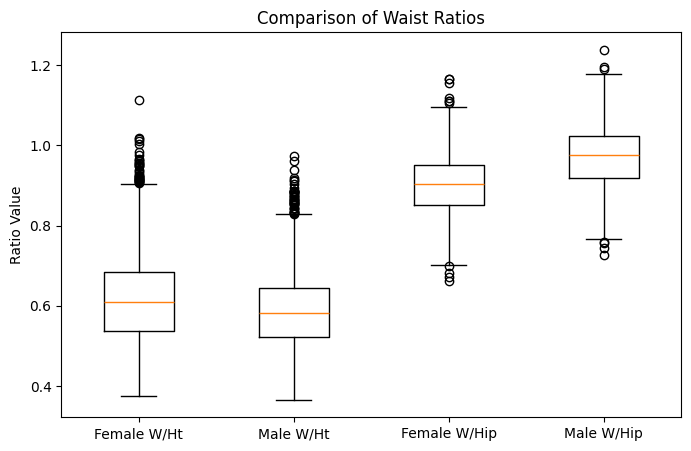

In [15]:
plt.figure(figsize=(8, 5))
plt.boxplot(
    [female_wth, male_wth, female_whr, male_whr],
    labels=["Female W/Ht", "Male W/Ht", "Female W/Hip", "Male W/Hip"]
)
plt.title("Comparison of Waist Ratios")
plt.ylabel("Ratio Value")
plt.show()


In [16]:
bmi_sorted_indices = np.argsort(female[:, 7])

lowest_bmi = zfemale[bmi_sorted_indices[:5]]
highest_bmi = zfemale[bmi_sorted_indices[-5:]]

print("Standardised values for 5 lowest BMI individuals:\n", lowest_bmi)
print("\nStandardised values for 5 highest BMI individuals:\n", highest_bmi)


Standardised values for 5 lowest BMI individuals:
 [[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]]

Standardised values for 5 highest BMI individuals:
 [[ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343  4

In [17]:
# Index of BMI column
bmi_col = 7

# Sort indices by BMI
sorted_bmi_idx = np.argsort(female[:, bmi_col])

# Select 5 lowest and 5 highest BMI indices
selected_idx = np.concatenate([
    sorted_bmi_idx[:5],
    sorted_bmi_idx[-5:]
])

# Extract corresponding standardized rows
zfemale_selected = zfemale[selected_idx]

zfemale_selected


array([[-2.07978523, -1.22299143, -1.5478402 , -1.16905675, -2.1947611 ,
        -2.0405496 , -1.94212128, -2.05024028],
       [-1.88017988, -0.18929313, -1.71835247,  0.38637892, -2.4443617 ,
        -1.85491922, -2.05708015, -1.99487987],
       [-1.53667299,  1.80730222,  0.62619127,  0.5730312 , -2.26607556,
        -1.6756899 , -1.7064556 , -1.97088383],
       [-1.843044  , -0.26009438, -0.22637009,  0.51081377, -2.30173278,
        -2.25178417, -1.85590213, -1.94177591],
       [-1.61094475,  0.88688592, -0.09848588,  0.47970506, -2.21258971,
        -1.82931504, -1.71220354, -1.89319577],
       [ 4.2472403 ,  0.29215539,  1.86240524, -0.98240447,  2.3693641 ,
         4.10445598,  3.81731803,  4.39649161],
       [ 4.45612963,  0.50455915,  1.69189297, -1.13794804,  3.34993787,
         3.98283607,  2.90339503,  4.46201122],
       [ 4.34936397,  0.27799514,  2.84285081,  1.94181459,  4.36616887,
         3.9188256 ,  3.75409065,  4.51466896],
       [ 4.8042785 ,  0.88688592

In [18]:
column_names = [
    "Weight", "Height", "Upper Arm Length", "Upper Leg Length",
    "Arm Circumference", "Hip Circumference", "Waist Circumference", "BMI"
]

print("Standardised body measurements for individuals with extreme BMI values:\n")

for i, row in enumerate(zfemale_selected):
    label = "Lowest BMI" if i < 5 else "Highest BMI"
    print(f"{label} Person {i+1 if i < 5 else i-4}:")
    for col, value in zip(column_names, row):
        print(f"  {col}: {value:.2f}")
    print()


Standardised body measurements for individuals with extreme BMI values:

Lowest BMI Person 1:
  Weight: -2.08
  Height: -1.22
  Upper Arm Length: -1.55
  Upper Leg Length: -1.17
  Arm Circumference: -2.19
  Hip Circumference: -2.04
  Waist Circumference: -1.94
  BMI: -2.05

Lowest BMI Person 2:
  Weight: -1.88
  Height: -0.19
  Upper Arm Length: -1.72
  Upper Leg Length: 0.39
  Arm Circumference: -2.44
  Hip Circumference: -1.85
  Waist Circumference: -2.06
  BMI: -1.99

Lowest BMI Person 3:
  Weight: -1.54
  Height: 1.81
  Upper Arm Length: 0.63
  Upper Leg Length: 0.57
  Arm Circumference: -2.27
  Hip Circumference: -1.68
  Waist Circumference: -1.71
  BMI: -1.97

Lowest BMI Person 4:
  Weight: -1.84
  Height: -0.26
  Upper Arm Length: -0.23
  Upper Leg Length: 0.51
  Arm Circumference: -2.30
  Hip Circumference: -2.25
  Waist Circumference: -1.86
  BMI: -1.94

Lowest BMI Person 5:
  Weight: -1.61
  Height: 0.89
  Upper Arm Length: -0.10
  Upper Leg Length: 0.48
  Arm Circumference: 

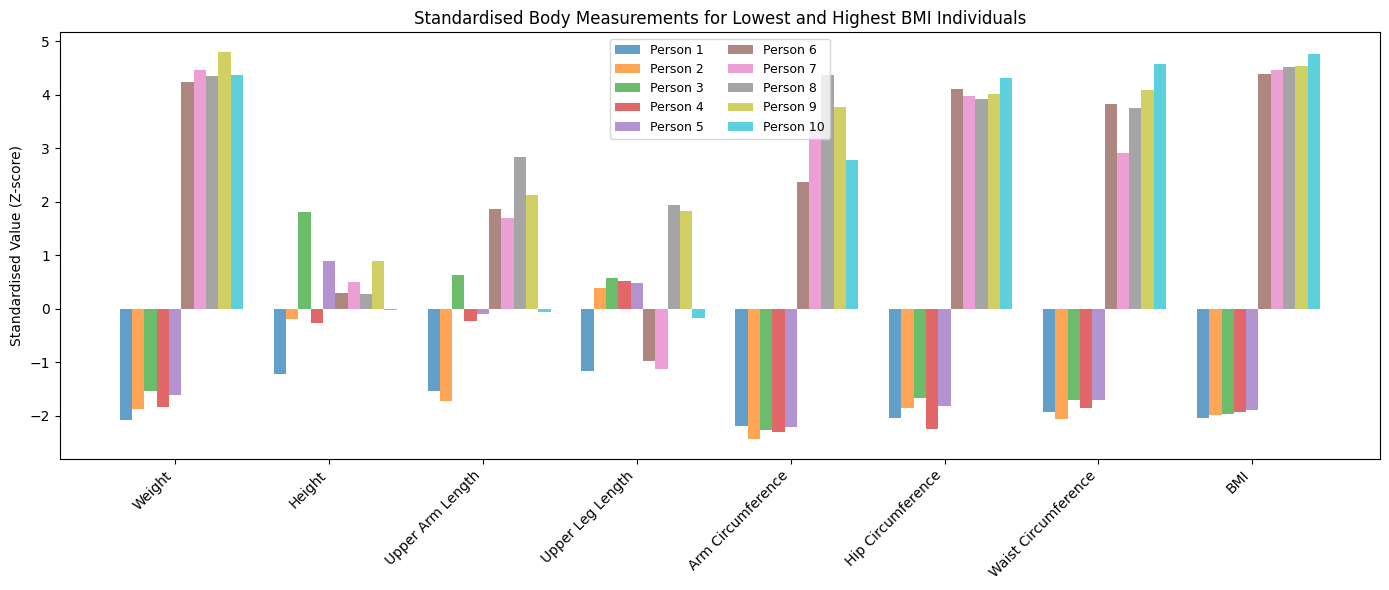

In [19]:
plt.figure(figsize=(14, 6))

x = np.arange(len(column_names))

for i in range(zfemale_selected.shape[0]):
    plt.bar(
        x + i*0.08,
        zfemale_selected[i],
        width=0.08,
        alpha=0.7,
        label=f"Person {i+1}"
    )

plt.xticks(x + 0.32, column_names, rotation=45, ha="right")
plt.ylabel("Standardised Value (Z-score)")
plt.title("Standardised Body Measurements for Lowest and Highest BMI Individuals")
plt.legend(ncol=2, fontsize=9)
plt.tight_layout()
plt.show()
